In [187]:
# 1 Set up the environment Install Python (Anaconda Navigator, then PyCharm ), NumPy, Pandas, Seaborn, Matplotlib
''' I installed them one by one as I needed them to avoid errors.
    When I wanted to use another one I installed it and then press Run again.
'''

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from joblib import dump


# 2 Getting and loading the data
'''I'll use the Laptop Price dataset */
   From https://www.kaggle.com/datasets/muhammetvarl/laptop-price
   which I saved in my computer
'''

df = pd.read_csv('C:/Users/Julia/Desktop/LaptopPriceProject/laptop_price.csv')

In [188]:
# 3 EDA

# EDA Summary
# 3.1 The first few rows of the dataset
# 3.2 Checking the size of the dataset
# 3.3 Getting a dataframe summary
# 3.4 Check the columns' names and rename for consistency correcting with lowercase, and without spaces
# 3.5 Checking each column's data types
# 3.6 Cleaning 'ram' column
# 3.7 Checking for min and max values
# 3.8 Checking for missing values

# 3.1 Take a look at the first few rows of the dataset
print(df.head())

# 3.1 Take a closer look at the first few rows of the dataset
''' In PyCharm, because the above command is displaying only a few rows,
    Set the display option to show all columns
    pd.set_option('display.max_columns', None)
    and then take another look at the first few rows of the dataset
    df = pd.read_csv('C:/Users/Julia/Desktop/LaptopPriceProject/laptop_price.csv')
    print(df.head(2))
'''

   laptop_ID Company      Product   TypeName  Inches  \
0          1   Apple  MacBook Pro  Ultrabook    13.3   
1          2   Apple  Macbook Air  Ultrabook    13.3   
2          3      HP       250 G6   Notebook    15.6   
3          4   Apple  MacBook Pro  Ultrabook    15.4   
4          5   Apple  MacBook Pro  Ultrabook    13.3   

                     ScreenResolution                         Cpu   Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.34kg   

" In PyCharm, because the above command is displaying only a few rows,\n    Set the display option to show all columns\n    pd.set_option('display.max_columns', None)\n    and then take another look at the first few rows of the dataset\n    df = pd.read_csv('C:/Users/Julia/Desktop/LaptopPriceProject/laptop_price.csv')\n    print(df.head(2))\n"

In [189]:
# 3.2 Checking the size of the dataset
'''A method which provides essential information about a DataFrame including:
    The number of entries/rows.
    The number of columns.
    The column names.
    The number of non-null values in each column.
    The data type of each column.
    The memory usage of the data.
    This method is particularly useful for a quick examination of the data's structure and to assess which columns have missing data that may require cleaning.
'''
# 3.2 Checking the shape of the dataset (the numbers of rows and columns)
print(df.shape)

(1303, 13)


In [190]:
# 3.3 Getting a dataframe summary
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB
None


In [191]:
# 3.4 Now let's take a look only at the columns' names
print(df.columns)

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')


In [192]:
# 3.4 Rename the columns
df.rename(columns={'OpSys': 'operation_system'}, inplace=True)
df.rename(columns={'TypeName': 'type_name'}, inplace=True)
df.rename(columns={'ScreenResolution': 'screen_resolution'}, inplace=True)
df.rename(columns={'Price_euros': 'price_euros'}, inplace=True)

# and let's see the changes
print(df.columns)

Index(['laptop_ID', 'Company', 'Product', 'type_name', 'Inches',
       'screen_resolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'operation_system',
       'Weight', 'price_euros'],
      dtype='object')


In [193]:
# 3.4 Replace uppercase letters with lowercase, and empty spaces with underlines
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

# Let's see the changes with print(df.columns) or
df.head()

,laptop_id,company,product,type_name,inches,screen_resolution,cpu,ram,memory,gpu,operation_system,weight,price_euros
0,1,apple,macbook_pro,ultrabook,13.3,ips_panel_retina_display_2560x1600,intel_core_i5_2.3ghz,8gb,128gb_ssd,intel_iris_plus_graphics_640,macos,1.37kg,1339.69
1,2,apple,macbook_air,ultrabook,13.3,1440x900,intel_core_i5_1.8ghz,8gb,128gb_flash_storage,intel_hd_graphics_6000,macos,1.34kg,898.94
2,3,hp,250_g6,notebook,15.6,full_hd_1920x1080,intel_core_i5_7200u_2.5ghz,8gb,256gb_ssd,intel_hd_graphics_620,no_os,1.86kg,575.00
3,4,apple,macbook_pro,ultrabook,15.4,ips_panel_retina_display_2880x1800,intel_core_i7_2.7ghz,16gb,512gb_ssd,amd_radeon_pro_455,macos,1.83kg,2537.45
4,5,apple,macbook_pro,ultrabook,13.3,ips_panel_retina_display_2560x1600,intel_core_i5_3.1ghz,8gb,256gb_ssd,intel_iris_plus_graphics_650,macos,1.37kg,1803.60


In [194]:
# 3.5 Checking the data types of each column to understand what kinds of data are present
print(df.dtypes)

laptop_id              int64
company               object
product               object
type_name             object
inches               float64
screen_resolution     object
cpu                   object
ram                   object
memory                object
gpu                   object
operation_system      object
weight                object
price_euros          float64
dtype: object


In [195]:
# 3.6 Replace 'GB' with an empty string in the 'ram' column
df['ram'] = df['ram'].str.replace('GB', '')

# And take another look at the first few rows of the dataset
print(df.head())

   laptop_id company      product  type_name  inches  \
0          1   apple  macbook_pro  ultrabook    13.3   
1          2   apple  macbook_air  ultrabook    13.3   
2          3      hp       250_g6   notebook    15.6   
3          4   apple  macbook_pro  ultrabook    15.4   
4          5   apple  macbook_pro  ultrabook    13.3   

                    screen_resolution                         cpu   ram  \
0  ips_panel_retina_display_2560x1600        intel_core_i5_2.3ghz   8gb   
1                            1440x900        intel_core_i5_1.8ghz   8gb   
2                   full_hd_1920x1080  intel_core_i5_7200u_2.5ghz   8gb   
3  ips_panel_retina_display_2880x1800        intel_core_i7_2.7ghz  16gb   
4  ips_panel_retina_display_2560x1600        intel_core_i5_3.1ghz   8gb   

                memory                           gpu operation_system  weight  \
0            128gb_ssd  intel_iris_plus_graphics_640            macos  1.37kg   
1  128gb_flash_storage        intel_hd_graphics_60

In [196]:
# 3.7 Checking for min and max values
'''Examining the minimum and maximum values of each feature in a dataset
    is a fundamental aspect of exploratory data analysis.
    It gives you a sense of the range of values 
    and can help identify possible outliers or errors in data collection.
'''

# Get min-max values for all numerical features
min_max_values = df.describe().loc[['min', 'max']]
print(min_max_values)

     laptop_id  inches  price_euros
min        1.0    10.1        174.0
max     1320.0    18.4       6099.0


In [197]:
# 3.7 Checking for missing values
missing_values = df.isnull().sum()
print(missing_values)

laptop_id            0
company              0
product              0
type_name            0
inches               0
screen_resolution    0
cpu                  0
ram                  0
memory               0
gpu                  0
operation_system     0
weight               0
price_euros          0
dtype: int64


In [198]:
# Log transform the price column.
df['log_price'] = np.log1p(df['price_euros'])

# but first make sure that numpy is installed

"This line above uses Seaborn's histplot function to plot a histogram.\n    df['price'] specifies the data from the 'price' column in the dataframe.\n    bins=50 divides the data into 50 bins for the histogram, providing a detailed view of the distribution.\n    color='black sets the color of the histogram bars to black.\n    alpha=1 makes the bars fully opaque.\n"

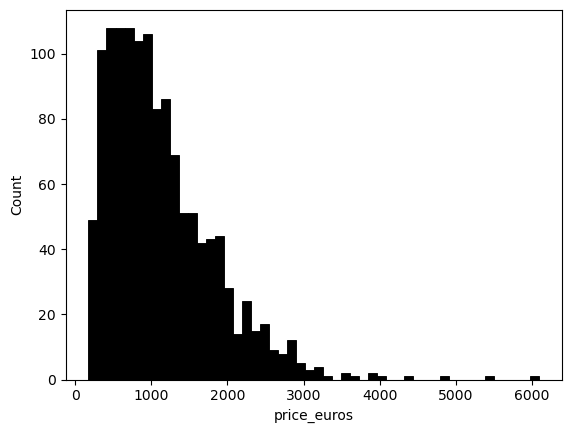

In [199]:
# Creating a histogram of the 'price' column from the DataFrame 'df'
'''but first make sure that seaborb and matplotlib are installed'''

sns.histplot(df['price_euros'], bins=50, color='black', alpha=1)

'''This line above uses Seaborn's histplot function to plot a histogram.
    df['price'] specifies the data from the 'price' column in the dataframe.
    bins=50 divides the data into 50 bins for the histogram, providing a detailed view of the distribution.
    color='black sets the color of the histogram bars to black.
    alpha=1 makes the bars fully opaque.
'''

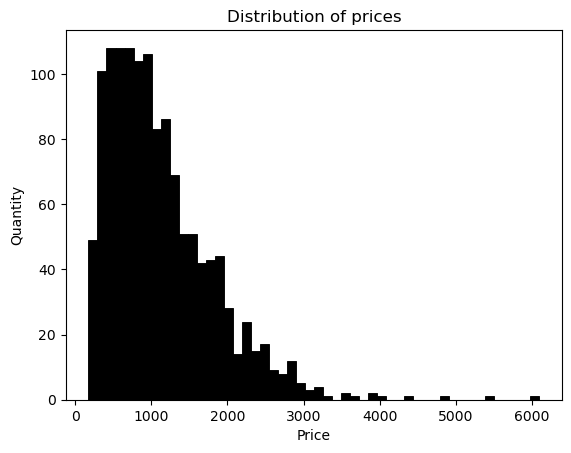

In [200]:
# aaaand it works!
# Now let's beautify this histogram addind appropriate labels

'''
    Setting the label for the y-axis as 'Quantity'
    plt.ylabel('Quantity')
    The ylabel function is used to set the label of the y-axis.
    'Quantity' refers to the number of occurrences or frequency of prices within each bin.

    Setting the label for the x-axis as 'Price'
    plt.xlabel('Price')
    The xlabel function is used to set the label of the x-axis.
    'Price' indicates that the histogram is showing the distribution of different price values.

    Setting the title of the histogram plot
    plt.title('Distribution of prices')
    The title function is used to set the title of the plot.
    'Distribution of prices' gives a descriptive title, indicating what the plot represents.

    Displaying the plot
    plt.show()
    The show function renders the plot and displays it to the user.
    It's a necessary command to actually visualize the plot when using Matplotlib.
'''

sns.histplot(df['price_euros'], bins=50, color='black', alpha=1)
plt.ylabel('Quantity')
plt.xlabel('Price')
plt.title('Distribution of prices')
plt.show()

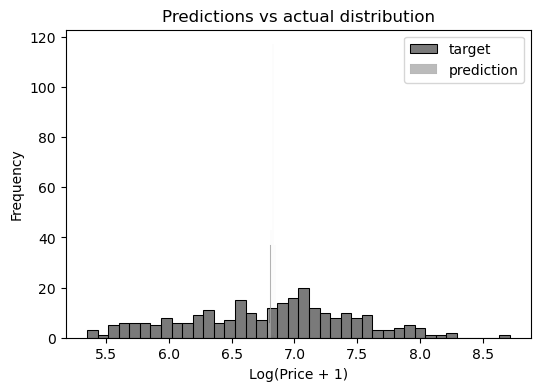

In [201]:
# Validation Framework
np.random.seed(2)
n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

y_train_orig = df_train.price_euros.values
y_val_orig = df_val.price_euros.values
y_test_orig = df_test.price_euros.values

y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)
y_test = np.log1p(y_test_orig)

del df_train['price_euros']
del df_val['price_euros']
del df_test['price_euros']

# Linear Regression Model Training
def train_linear_regression(X, y):
    model = LinearRegression()
    model.fit(X, y)
    return model

# Feature Preparation
base = ['company', 'type_name', 'inches']  # Make sure these are the correct feature names

def prepare_X(df):
    df_num = df.copy()
    for col in base:
        df_num[col] = pd.to_numeric(df_num[col], errors='coerce')
    df_num = df_num.fillna(0)
    X = df_num[base].values
    return X

# Prepare the data
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

# Train the model
model = train_linear_regression(X_train, y_train)

# Save the trained model
dump(model, 'model.joblib')

# Make predictions
y_pred = model.predict(X_val)

# Plot the predictions vs actual distribution
plt.figure(figsize=(6, 4))
sns.histplot(y_val, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')
plt.show()

In [202]:
from flask import Flask, request, jsonify
from joblib import load
from threading import Thread

app = Flask(__name__)

# Load the trained model
model = load('model.joblib')

@app.route('/')
def home():
    return "This is the model prediction service!"

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    # Preprocess the input data as required, similar to how you did in the notebook
    # For example, if you expect a single feature called 'feature_input'
    input_data = [data['feature_input']]
    # Use the model to make a prediction
    prediction = model.predict([input_data])
    return jsonify({'prediction': prediction.tolist()})

# Define the function that will run the Flask app
def run_app():
    # Set the threaded argument to True to handle each request in a separate thread.
    app.run(port=6969, debug=True, use_reloader=False, threaded=True)

# Run the Flask app in a separate thread to avoid blocking the notebook
flask_thread = Thread(target=run_app)
flask_thread.start()

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:6969
Press CTRL+C to quit
127.0.0.1 - - [06/Nov/2023 22:30:05] "GET / HTTP/1.1" 200 -
